Datasource: https://github.com/factbook/factbook.sql/releases

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect("factbook1.db") #connecting to the database
q = "SELECT * FROM sqlite_master WHERE type='table';" #query that returns information about files
conn.execute(q).fetchall() #executing query and fetching result. Returns a list of tuples.

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)'),
 ('table',
  'cities',
  'cities',
  2,
  'CREATE TABLE cities (\n        id integer primary key,\n        name text,\n        population integer,\n        capital bool,\n        facts_id text,\n        foreign key(facts_id) references facts(id)\n    )')]

In [4]:
pd.read_sql_query(q,conn) # a better way to display the information from a sql query as it returns a dataframe

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
2,table,cities,cities,2,CREATE TABLE cities (\n id integer prim...


In [5]:
q1 = 'SELECT * FROM facts' # viewing the facts table from the database
pd.read_sql_query(q1,conn).head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


### Column descriptions

`name` - The name of the country.<br>
`area` - The total land and sea area of the country.
<br>`population` - The country's population.
<br>`population_growth`- The country's population growth as a percentage.
<br>`birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
<br>`death_rate` - The country's death rate, or the number of death a year per 1,000 people.
<br>`area`- The country's total area (both land and water).
<br>`area_land` - The country's land area in square kilometers.<br>
`area_water` - The country's waterarea in square kilometers.

### Population Stats

In [6]:
q3 = 'SELECT MAX(population), MIN(population), MAX(population_growth), MIN(population_growth) FROM facts'
pd.read_sql_query(q3,conn)

,MAX(population),MIN(population),MAX(population_growth),MIN(population_growth)
0,7256490011,0,4.02,0.0


Surprisingly the maximum population is 7.2B and min is 0

In [7]:
# Lets see what countries these populations represent
q4 = 'SELECT name FROM facts WHERE population IN (7256490011,0)'
pd.read_sql_query(q4,conn)

,name
0,Antarctica
1,World


We see that the data also contains world population, not just country wise and hence we got a max population of 7.25B. While the population of 0 is for Antartica.

In [8]:
q5 = '''SELECT name, population, population_growth, birth_rate, death_rate 
FROM facts WHERE name != "Antarctica" AND name!="WORLD"
'''
df = pd.read_sql_query(q5,conn)
df.head()

,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342.0,2.32,38.57,13.89
1,Albania,3029278.0,0.30,12.92,6.58
2,Algeria,39542166.0,1.84,23.67,4.31
3,Andorra,85580.0,0.12,8.13,6.96
4,Angola,19625353.0,2.78,38.78,11.49


#### Plotting Histograms 

C:\Users\Tejas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


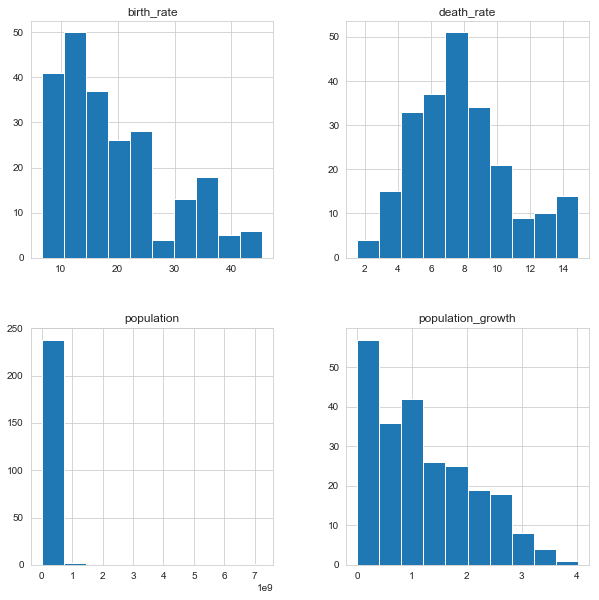

In [9]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
df.hist(ax=ax)
plt.show()

#### Population Densities

In [10]:
q6 = '''SELECT name, population*1.0/area_land population_density FROM facts 
WHERE population != (SELECT max(population) FROM facts) 
      AND population != (SELECT min(population) FROM facts)
ORDER BY population_density DESC'''
pd.read_sql_query(q6,conn).head(10)
#Note that we get a null result for a few islands

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


#### Population Ratios

In [11]:
#Countries representing more than 1% of world population using a subquery
q7 = '''
SELECT name, ROUND(population*100.0/
    (SELECT population FROM facts WHERE name == 'World')
    ,2)
AS percentage_of_total 
FROM facts
WHERE percentage_of_total >1 AND name!='World' AND name!='European Union'
ORDER BY 2 DESC
'''
pd.read_sql_query(q7,conn)

#India and China togther represent more than 35% percent of the worlds population.

,name,percentage_of_total
0,China,18.84
1,India,17.25
2,United States,4.43
3,Indonesia,3.53
4,Brazil,2.81
5,Pakistan,2.74
6,Nigeria,2.50
7,Bangladesh,2.33
8,Russia,1.96
9,Japan,1.75


###  Water area to total area ratio

In [12]:
#countries that have the highest ratio of water 
q8 = '''
SELECT name, ROUND(area_water*100.0/area,2)  AS '% water in total area'
FROM facts 
ORDER BY area_water*100.0/area DESC LIMIT 20
'''
pd.read_sql_query(q8,conn)

,name,% water in total area
0,British Indian Ocean Territory,99.89
1,Virgin Islands,81.88
2,Puerto Rico,35.68
3,"Bahamas, The",27.88
4,Guinea-Bissau,22.16
5,Malawi,20.60
6,Netherlands,18.41
7,Uganda,18.23
8,Eritrea,14.12
9,Liberia,13.51


### Cities Data

In [13]:
a1 = '''
SELECT * FROM cities LIMIT 10
'''
pd.read_sql_query(a1,conn)

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184
5,6,Kabul,3097000,1,1
6,7,Algiers,2916000,1,3
7,8,Oran,783000,0,3
8,9,Baku,2123000,1,11
9,10,Tirana,419000,1,2


This data represents major cities for many countries. The last column `facts_id` represents the primary key from `facts` table.

### Joining data

In [14]:
a2 = '''
SELECT * FROM facts
INNER JOIN cities ON facts.id = cities.facts_id
'''
pd.read_sql_query(a2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,216,aa,Aruba,180.0,180.0,0.0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
1,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
2,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
3,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
4,184,ae,United Arab Emirates,83600.0,83600.0,0.0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184
5,1,af,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51,6,Kabul,3097000,1,1
6,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92,7,Algiers,2916000,1,3
7,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92,8,Oran,783000,0,3
8,11,aj,Azerbaijan,86600.0,82629.0,3971.0,9780780,0.96,16.64,7.07,0.00,9,Baku,2123000,1,11
9,2,al,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30,10,Tirana,419000,1,2


In [15]:
a3 = '''
SELECT c.*,f.name country_name FROM cities c
INNER JOIN facts f ON f.id = c.facts_id
LIMIT 5
'''
pd.read_sql_query(a3,conn)

,id,name,population,capital,facts_id,country_name
0,1,Oranjestad,37000,1,216,Aruba
1,2,Saint John'S,27000,1,6,Antigua and Barbuda
2,3,Abu Dhabi,942000,1,184,United Arab Emirates
3,4,Dubai,1978000,0,184,United Arab Emirates
4,5,Sharjah,983000,0,184,United Arab Emirates


In [18]:
#Capital cities for all the countries

a4 = '''
SELECT f.name country, c.name capital_city from cities c
INNER JOIN facts f ON f.id=c.facts_id
WHERE c.capital =1
'''
pd.read_sql_query(a4,conn).head(10)


,country,capital_city
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,Afghanistan,Kabul
4,Algeria,Algiers
5,Azerbaijan,Baku
6,Albania,Tirana
7,Armenia,Yerevan
8,Andorra,Andorra La Vella
9,Angola,Luanda


In [20]:
# All the countries for which capital city information is missing

a5 = '''
SELECT f.name AS country,f.population,c.name capital_city FROM facts f
LEFT JOIN cities c ON f.id=c.facts_id
WHERE c.name IS NULL
'''
pd.read_sql_query(a5,conn).head(10)

,country,population,capital_city
0,Kosovo,1870981.0,None
1,Monaco,30535.0,None
2,Nauru,9540.0,None
3,San Marino,33020.0,None
4,Singapore,5674472.0,None
5,Holy See (Vatican City),842.0,None
6,Taiwan,23415126.0,None
7,European Union,513949445.0,None
8,Ashmore and Cartier Islands,NaN,None
9,Christmas Island,1530.0,None


In [21]:
# Most populated capital cities
a6 = '''
SELECT c.name capital_city, f.name country, c.population population FROM facts f
INNER JOIN cities c ON f.id=c.facts_id
WHERE c.capital=1
ORDER BY population DESC
LIMIT 10
'''
pd.read_sql_query(a6,conn)

,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000
9,Jakarta,Indonesia,9769000


In [25]:
#All cties that have population above 10M using a subquery
a7 = '''
SELECT c.name capital_city, f.name country, c.population  AS population 
FROM facts f INNER JOIN (SELECT * FROM cities WHERE capital=1 AND population > 10000000) AS c 
ON c.facts_id = f.id
ORDER BY population DESC
'''
pd.read_sql_query(a7,conn)



,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000


In [28]:
# the countries where the urban center (city) population is more than half of the country's total population

a8 = '''
SELECT 
    f.name country,
    c.urban_pop urban_pop,
    f.population total_pop,
    urban_pop*1.0/f.population AS urban_pct FROM facts f
INNER JOIN 
    (SELECT facts_id, SUM(population) urban_pop FROM cities 
     GROUP BY facts_id) c 
ON c.facts_id = f.id
WHERE urban_pct > 0.5
ORDER BY urban_pct
'''
pd.read_sql_query(a8,conn)

,country,urban_pop,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248
